In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import random
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten, Conv2D, MaxPooling2D,BatchNormalization

In [ ]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()
# ! mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ciplab/real-and-fake-face-detection
!unzip real-and-fake-face-detection.zip -d /content/

real-and-fake-face-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  real-and-fake-face-detection.zip
replace /content/real_and_fake_face/training_fake/easy_100_1111.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/real_and_fake_face/training_fake/easy_101_0010.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/real_and_fake_face/training_fake/easy_102_0101.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#renaming real and fake directories

real = "/content/real_and_fake_face_detection/real_and_fake_face/training_real"
fake = "/content/real_and_fake_face_detection/real_and_fake_face/training_fake"
#we're creating a list of real and fake images
real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [ ]:
#creating training data with label for both genuine and fake images together
#we want to one hot encode our label such that it is in the following format
# [1] = genuine; 
# [0] = fake


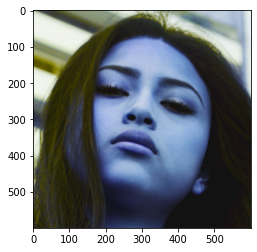

In [ ]:
plt.imshow(cv2.imread(os.path.join(real, real_path[0])))

In [ ]:
   
img_size = int(128)
def create_training_data():
    training_data = []
    y=[]
    for img in tqdm(real_path[:981]):
        path = os.path.join(real, img)
#         label = [1] 
        image = cv2.resize( cv2.imread(path), (img_size,img_size) )
        training_data.append(np.array(image))
        y.append(1)
        
    for img in tqdm(fake_path[:860]):
        path = os.path.join(fake, img)
#         label = [0] 
        image = cv2.resize(cv2.imread(path), (img_size,img_size))
        training_data.append(np.array(image))  
        y.append(0)
        
    return(training_data,y)

def create_test_data():
    test_data = []
    output_data=[]
    for img in tqdm(real_path[981:]):
        path = os.path.join(real, img)
        image = cv2.resize( cv2.imread(path), (img_size,img_size) )
        
        
        test_data.append(np.array(image))
        output_data.append(1)
        
    for img in tqdm(fake_path[860:]):
        path = os.path.join(fake, img)
        image = cv2.resize(cv2.imread(path), (img_size,img_size))
        
        test_data.append(np.array(image))
        output_data.append(0)

    return(test_data,output_data)

    

X_train,Y_train = create_training_data()
X_test,Y_test= create_test_data()

100%|██████████| 100/100 [00:01<00:00, 73.58it/s]


In [ ]:
l=list(zip(X_train,Y_train))
shuffle(l)
X_train,Y_train=zip(*l)

In [ ]:
# print(X[0].reshape(-1, 50, 50, 1))
X_train = np.array(X_train)

#divide by 255 to squish values to 0 - 1 normalization
X_train = X_train/255.0
Y_train=np.array(Y_train)


X_test = np.array(X_test)

#divide by 255 to squish values to 0 - 1 normalization
X_test = X_test/255.0
Y_test=np.array(Y_test)

In [ ]:
print(X_train.shape[1:])
print(X_train.shape[:])
#checking shape of array to confirm
# print(len(y))

(128, 128, 3)
(1841, 128, 128, 3)


In [ ]:
X_train[1]

array([[[0.16470588, 0.28235294, 0.49411765],
        [0.16078431, 0.28627451, 0.48235294],
        [0.15686275, 0.27843137, 0.48627451],
        ...,
        [0.28627451, 0.34509804, 0.35686275],
        [0.27058824, 0.34901961, 0.35294118],
        [0.27058824, 0.34901961, 0.35294118]],

       [[0.19215686, 0.31764706, 0.51372549],
        [0.18823529, 0.31764706, 0.49803922],
        [0.18823529, 0.31372549, 0.50588235],
        ...,
        [0.2745098 , 0.35294118, 0.36078431],
        [0.26666667, 0.34117647, 0.36078431],
        [0.25490196, 0.32941176, 0.34901961]],

       [[0.22352941, 0.3372549 , 0.5254902 ],
        [0.21176471, 0.33333333, 0.50196078],
        [0.21176471, 0.3254902 , 0.50196078],
        ...,
        [0.27058824, 0.34117647, 0.36078431],
        [0.25882353, 0.33333333, 0.35294118],
        [0.24705882, 0.32156863, 0.34117647]],

       ...,

       [[0.15294118, 0.2       , 0.23921569],
        [0.14901961, 0.19607843, 0.23529412],
        [0.14509804, 0

In [ ]:
df=pd.DataFrame(Y_train)
df[0].value_counts()

1    981
0    860
Name: 0, dtype: int64

(128, 128, 3)

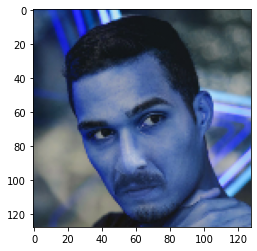

In [ ]:
plt.imshow(X_train[1])
X_train[1].shape

In [ ]:
#let us make the model

model = Sequential()

model.add(Conv2D(64,(3,3), input_shape=X_train.shape[1:])) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu")) 

model.add(Conv2D(32,(3,3)))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))

model.add(Conv2D(16,(3,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))



model.add(Flatten()) 

model.add(Dense(128,kernel_regularizer="l2"))
model.add(Activation("relu",))
model.add(Dropout(0.12))


model.add(Dense(1)) 
model.add(Activation("sigmoid"))


opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])

Epoch 1/25
23/23 [==============================] - 48s 2s/step - loss: 1.9394 - accuracy: 0.5177 - val_loss: 1.0889 - val_accuracy: 0.5339
Epoch 2/25
23/23 [==============================] - 45s 2s/step - loss: 0.8514 - accuracy: 0.5448 - val_loss: 0.7306 - val_accuracy: 0.5366
Epoch 3/25
23/23 [==============================] - 45s 2s/step - loss: 0.7137 - accuracy: 0.5299 - val_loss: 0.7020 - val_accuracy: 0.5528
Epoch 4/25
23/23 [==============================] - 51s 2s/step - loss: 0.6977 - accuracy: 0.5442 - val_loss: 0.6975 - val_accuracy: 0.5393
Epoch 5/25
23/23 [==============================] - 45s 2s/step - loss: 0.6920 - accuracy: 0.5408 - val_loss: 0.6836 - val_accuracy: 0.6043
Epoch 6/25
23/23 [==============================] - 45s 2s/step - loss: 0.6867 - accuracy: 0.5611 - val_loss: 0.6988 - val_accuracy: 0.5610
Epoch 7/25
23/23 [==============================] - 47s 2s/step - loss: 0.6876 - accuracy: 0.5808 - val_loss: 0.6965 - val_accuracy: 0.5854
Epoch 8/25
23/23 [==

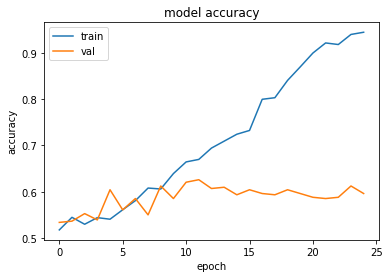

In [ ]:
history=model.fit(X_train,Y_train, batch_size = 64, epochs = 25, validation_split = 0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 1s 191ms/step - loss: 2.0045 - accuracy: 0.5500


[2.004537582397461, 0.550000011920929]

In [ ]:
model.save('my_finalised_cnn', save_format='tf')

INFO:tensorflow:Assets written to: my_finalised_cnn/assets


In [ ]:
trained_model = keras.models.load_model('my_finalised_cnn') 
print (trained_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 activation (Activation)     (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0

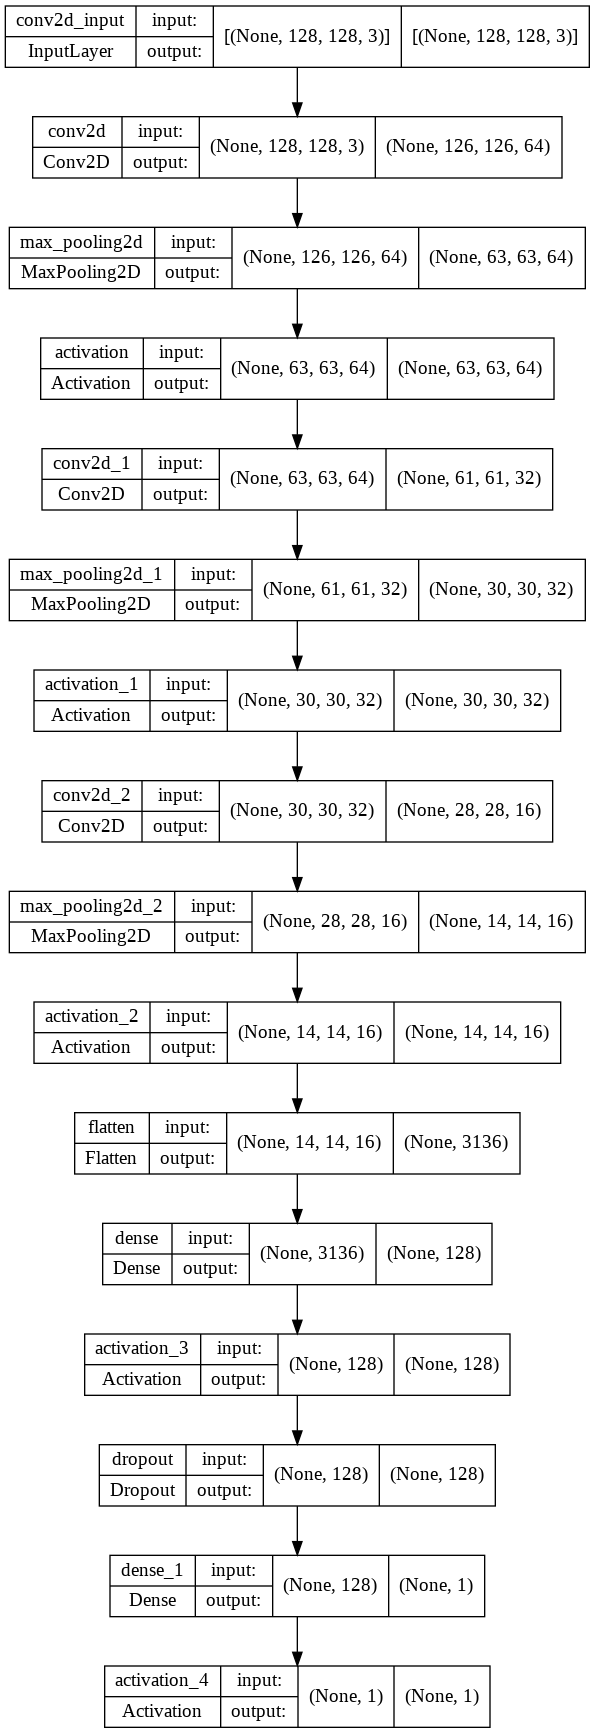

In [ ]:

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(model).create(prog="dot",format="svg"))

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
